<h1>Agriculture in India</h1>

<p1> Goal 1:<p1>
The following dataset contains information on the popular crops grown in India, along with different costs associated with them them in their respective states. 
This study aims to find if :

Goal 2:
1.	Which states grow the most crops.
2.	Check if cost of production is related to the production yield.
3.	Is the sampling for CC1 and CC2 positive for the t-test?

Goal 3:
	Proposal to list prices of produce in Foreign countries imported from India, and find which produce grows best in certain states, depending on season, production cost and time.



The following data was retrieved from the link below:
https://www.kaggle.com/devisangeetha/analysis-on-agricultural-production-in-india/notebook

Some values and abbreviations.
1 hectare= 10000 square meters.
1 quintal= 100kilograms.
Yield is measured in quintal/hectare.

Agricultural Costs and Prices.
A2- these costs cover all paid-out expenses from the farmer's pocket
A2 + FL - A2 along with Family labour costs.
C2- comprehensive cost of land, labour, rent etc.



In [428]:
import numpy as np
import pandas as pd
import scipy as scipy
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt


%matplotlib inline
df1= pd.read_csv("datafile (1).csv", low_memory=False)

In [497]:
#cc=cultivation cost
#CC1= A2+FL/Hectare
#CC2= C2/Hectare
#CC3= C2/Quintal
#Yield=(Quintal/ Hectare)

df1.columns=[
            'Crop',
            'State',
            'CC1',
            'CC2',
            'CC3',
            'Yield',
            'costtotal']
df1['costtotal']= df1['CC1'] + df1['CC2'] + df1['CC3']
df1


,Crop,State,CC1,CC2,CC3,Yield,costtotal
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,34812.34
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,29294.29
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,34919.02
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,44893.85
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,45176.61
5,COTTON,Maharashtra,23711.44,33116.82,2539.47,12.69,59367.73
6,COTTON,Punjab,29047.10,50828.83,2003.76,24.39,81879.69
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83,76407.48
8,COTTON,Gujarat,29616.09,42070.44,2179.26,19.05,73865.79
9,COTTON,Haryana,29918.97,44018.18,2127.35,19.90,76064.50


In [498]:
df1.shape

(49, 7)

In [499]:
df1.describe()

,CC1,CC2,CC3,Yield,costtotal
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735,53348.741837
std,13561.435306,20095.783569,1104.990472,245.293123,32995.450991
min,5483.540000,7868.640000,85.790000,1.320000,16364.660000
25%,12774.410000,19259.840000,732.620000,9.590000,34434.590000
50%,17022.000000,25909.050000,1595.560000,13.700000,44102.140000
75%,24731.060000,35423.480000,2228.970000,36.610000,61969.470000
max,66335.060000,91442.630000,5777.480000,1015.450000,155446.120000


In [279]:
df1.isnull().values.any() 

False

<h1> Grouping The Data </h1>

The following tables show the same data, arranged with groups and subgroups or Crop, State, and Yield.
This will show how much produce is cultivated, the cost of labour induced, and the states that grow these crops.

In [281]:
CropGroup= df1.groupby(['Crop','State','Yield'])
CropGroup.max()

CC1       CC2      CC3  \
Crop                 State          Yield                                  
ARHAR                Andhra Pradesh 6.42     17051.66  24171.65  3670.54   
                     Gujarat        9.59     13468.82  19551.90  1898.30   
                     Karnataka      7.47     10593.15  16528.68  2172.46   
                     Maharashtra    8.72     17130.55  25270.26  2775.80   
                     Uttar Pradesh  9.83      9794.05  23076.74  1941.55   
COTTON               Andhra Pradesh 17.83    29140.77  44756.72  2509.99   
                     Gujarat        19.05    29616.09  42070.44  2179.26   
                     Haryana        19.90    29918.97  44018.18  2127.35   
                     Maharashtra    12.69    23711.44  33116.82  2539.47   
                     Punjab         24.39    29047.10  50828.83  2003.76   
GRAM                 Andhra Pradesh 16.69    14421.98  26762.09  1559.04   
                     Madhya Pradesh 10.29     9803.89  16873.17  1551.94   
                     Maharashtra    8.05     12985.95  18679.33  2277.68   
                     Rajasthan      6.83      8552.69  12610.85  1691.66   
                     Uttar Pradesh  10.93    12833.04  21618.43  1882.68   
GROUNDNUT            Andhra Pradesh 11.97    21229.01  30434.61  2554.91   
                     Gujarat        13.45    22951.28  30114.45  1918.92   
                     Karnataka      4.71     13647.10  17314.20  3484.01   
                     Maharashtra    9.33     26078.66  32683.46  3207.35   
                     Tamil Nadu     11.98    22507.86  30393.66  2358.00   
MAIZE                Andhra Pradesh 42.68    25687.09  37801.85   840.58   
                     Bihar          42.95    13513.92  19857.70   404.43   
                     Karnataka      31.10    13792.85  20671.54   581.69   
                     Rajasthan      23.56    14421.46  19810.29   658.77   
                     Uttar Pradesh  13.70    15635.43  21045.11  1387.36   
MOONG                Andhra Pradesh 5.90      6684.18  13209.32  2228.97   
                     Karnataka      1.32      6440.64   7868.64  5777.48   
                     Maharashtra    6.70     10780.76  15371.45  2261.24   
                     Orissa         3.01      5483.54   8266.98  2614.14   
                     Rajasthan      4.05      6204.23   9165.59  2068.67   
PADDY                Andhra Pradesh 56.00    29664.84  46450.20   789.90   
                     Orissa         32.42    17478.05  25909.05   715.04   
                     Punjab         67.41    25154.75  45291.24   669.86   
                     Uttar Pradesh  36.61    17022.00  28144.50   732.62   
                     West Bengal    39.04    24731.06  33046.12   731.25   
RAPESEED AND MUSTARD Gujarat        11.61    13740.64  19083.55  1610.40   
                     Haryana        19.94    14715.27  27507.54  1251.12   
                     Madhya Pradesh 12.94     8686.43  17705.93  1279.60   
                     Rajasthan      13.54    11385.70  19259.84  1341.29   
                     Uttar Pradesh  13.57    12774.41  22560.30  1595.56   
SUGARCANE            Andhra Pradesh 757.92   56621.16  91442.63   119.72   
                     Karnataka      986.21   55655.44  86765.77    86.53   
                     Maharashtra    744.01   57673.60  85801.95   107.56   
                     Tamil Nadu     1015.45  66335.06  89025.27    85.79   
                     Uttar Pradesh  448.89   24538.32  45239.51    93.64   
WHEAT                Madhya Pradesh 23.59    12464.40  22489.75   810.25   
                     Punjab         39.83    17945.58  35423.48   804.80   
                     Rajasthan      37.19    19119.08  29876.36   683.58   
                     Uttar Pradesh  34.99    18979.38  31902.74   769.84   

                                             costtotal  
Crop                 State          Yield               
ARHAR                Andhra Pradesh 6.42      44893.85  
  

In [282]:
CropGroup.describe()

CC1                          \
                                            count      mean std       min   
Crop                 State          Yield                                   
ARHAR                Andhra Pradesh 6.42      1.0  17051.66 NaN  17051.66   
                     Gujarat        9.59      1.0  13468.82 NaN  13468.82   
                     Karnataka      7.47      1.0  10593.15 NaN  10593.15   
                     Maharashtra    8.72      1.0  17130.55 NaN  17130.55   
                     Uttar Pradesh  9.83      1.0   9794.05 NaN   9794.05   
COTTON               Andhra Pradesh 17.83     1.0  29140.77 NaN  29140.77   
                     Gujarat        19.05     1.0  29616.09 NaN  29616.09   
                     Haryana        19.90     1.0  29918.97 NaN  29918.97   
                     Maharashtra    12.69     1.0  23711.44 NaN  23711.44   
                     Punjab         24.39     1.0  29047.10 NaN  29047.10   
GRAM                 Andhra Pradesh 16.69     1.0  14421.98 NaN  14421.98   
                     Madhya Pradesh 10.29     1.0   9803.89 NaN   9803.89   
                     Maharashtra    8.05      1.0  12985.95 NaN  12985.95   
                     Rajasthan      6.83      1.0   8552.69 NaN   8552.69   
                     Uttar Pradesh  10.93     1.0  12833.04 NaN  12833.04   
GROUNDNUT            Andhra Pradesh 11.97     1.0  21229.01 NaN  21229.01   
                     Gujarat        13.45     1.0  22951.28 NaN  22951.28   
                     Karnataka      4.71      1.0  13647.10 NaN  13647.10   
                     Maharashtra    9.33      1.0  26078.66 NaN  26078.66   
                     Tamil Nadu     11.98     1.0  22507.86 NaN  22507.86   
MAIZE                Andhra Pradesh 42.68     1.0  25687.09 NaN  25687.09   
                     Bihar          42.95     1.0  13513.92 NaN  13513.92   
                     Karnataka      31.10     1.0  13792.85 NaN  13792.85   
                     Rajasthan      23.56     1.0  14421.46 NaN  14421.46   
                     Uttar Pradesh  13.70     1.0  15635.43 NaN  15635.43   
MOONG                Andhra Pradesh 5.90      1.0   6684.18 NaN   6684.18   
                     Karnataka      1.32      1.0   6440.64 NaN   6440.64   
                     Maharashtra    6.70      1.0  10780.76 NaN  10780.76   
                     Orissa         3.01      1.0   5483.54 NaN   5483.54   
                     Rajasthan      4.05      1.0   6204.23 NaN   6204.23   
PADDY                Andhra Pradesh 56.00     1.0  29664.84 NaN  29664.84   
                     Orissa         32.42     1.0  17478.05 NaN  17478.05   
                     Punjab         67.41     1.0  25154.75 NaN  25154.75   
                     Uttar Pradesh  36.61     1.0  17022.00 NaN  17022.00   
                     West Bengal    39.04     1.0  24731.06 NaN  24731.06   
RAPESEED AND MUSTARD Gujarat        11.61     1.0  13740.64 NaN  13740.64   
                     Haryana        19.94     1.0  14715.27 NaN  14715.27   
                     Madhya Pradesh 12.94     1.0   8686.43 NaN   8686.43   
                     Rajasthan      13.54     1.0  11385.70 NaN  11385.70   
                     Uttar Pradesh  13.57     1.0  12774.41 NaN  12774.41   
SUGARCANE            Andhra Pradesh 757.92    1.0  56621.16 NaN  56621.16   
                     Karnataka      986.21    1.0  55655.44 NaN  55655.44   
                     Maharashtra    744.01    1.0  57673.60 NaN  57673.60   
                     Tamil Nadu     1015.45   1.0  66335.06 NaN  66335.06   
                     Uttar Pradesh  448.89    1.0  24538.32 NaN  24538.32   
WHEAT                Madhya Pradesh 23.59     1.0  12464.40 NaN  12464.40   
                     Punjab         39.83     1.0  17945.58 NaN  17945.58   
                     Rajasthan      37.19     1.0  19119.08 NaN  19119.08   
                     Uttar Pradesh  34.99     1.0  18979.38 NaN  18979.38   

                                         

In [398]:
crop_yield= df1.set_index('State').groupby(['Crop']).apply(lambda x: x['Yield'].sort_values()).reset_index()
crop_yield

,Crop,State,Yield
0,ARHAR,Andhra Pradesh,6.42
1,ARHAR,Karnataka,7.47
2,ARHAR,Maharashtra,8.72
3,ARHAR,Gujarat,9.59
4,ARHAR,Uttar Pradesh,9.83
5,COTTON,Maharashtra,12.69
6,COTTON,Andhra Pradesh,17.83
7,COTTON,Gujarat,19.05
8,COTTON,Haryana,19.90
9,COTTON,Punjab,24.39


This table is similar to CropGroup, but looks at the States first, and the yield of the different crops being grown.

In [284]:
StateGroup= df1.groupby(['State','Yield']).max()
StateGroup

Crop       CC1       CC2      CC3  \
State          Yield                                                        
Andhra Pradesh 5.90                    MOONG   6684.18  13209.32  2228.97   
               6.42                    ARHAR  17051.66  24171.65  3670.54   
               11.97               GROUNDNUT  21229.01  30434.61  2554.91   
               16.69                    GRAM  14421.98  26762.09  1559.04   
               17.83                  COTTON  29140.77  44756.72  2509.99   
               42.68                   MAIZE  25687.09  37801.85   840.58   
               56.00                   PADDY  29664.84  46450.20   789.90   
               757.92              SUGARCANE  56621.16  91442.63   119.72   
Bihar          42.95                   MAIZE  13513.92  19857.70   404.43   
Gujarat        9.59                    ARHAR  13468.82  19551.90  1898.30   
               11.61    RAPESEED AND MUSTARD  13740.64  19083.55  1610.40   
               13.45               GROUNDNUT  22951.28  30114.45  1918.92   
               19.05                  COTTON  29616.09  42070.44  2179.26   
Haryana        19.90                  COTTON  29918.97  44018.18  2127.35   
               19.94    RAPESEED AND MUSTARD  14715.27  27507.54  1251.12   
Karnataka      1.32                    MOONG   6440.64   7868.64  5777.48   
               4.71                GROUNDNUT  13647.10  17314.20  3484.01   
               7.47                    ARHAR  10593.15  16528.68  2172.46   
               31.10                   MAIZE  13792.85  20671.54   581.69   
               986.21              SUGARCANE  55655.44  86765.77    86.53   
Madhya Pradesh 10.29                    GRAM   9803.89  16873.17  1551.94   
               12.94    RAPESEED AND MUSTARD   8686.43  17705.93  1279.60   
               23.59                   WHEAT  12464.40  22489.75   810.25   
Maharashtra    6.70                    MOONG  10780.76  15371.45  2261.24   
               8.05                     GRAM  12985.95  18679.33  2277.68   
               8.72                    ARHAR  17130.55  25270.26  2775.80   
               9.33                GROUNDNUT  26078.66  32683.46  3207.35   
               12.69                  COTTON  23711.44  33116.82  2539.47   
               744.01              SUGARCANE  57673.60  85801.95   107.56   
Orissa         3.01                    MOONG   5483.54   8266.98  2614.14   
               32.42                   PADDY  17478.05  25909.05   715.04   
Punjab         24.39                  COTTON  29047.10  50828.83  2003.76   
               39.83                   WHEAT  17945.58  35423.48   804.80   
               67.41                   PADDY  25154.75  45291.24   669.86   
Rajasthan      4.05                    MOONG   6204.23   9165.59  2068.67   
               6.83                     GRAM   8552.69  12610.85  1691.66   
               13.54    RAPESEED AND MUSTARD  11385.70  19259.84  1341.29   
               23.56                   MAIZE  14421.46  19810.29   658.77   
               37.19                   WHEAT  19119.08  29876.36   683.58   
Tamil Nadu     11.98               GROUNDNUT  22507.86  30393.66  2358.00   
               1015.45             SUGARCANE  66335.06  89025.27    85.79   
Uttar Pradesh  9.83                    ARHAR   9794.05  23076.74  1941.55   
               10.93                    GRAM  12833.04  21618.43  1882.68   
               13.57    RAPESEED AND MUSTARD  12774.41  22560.30  1595.56   
               13.70                   MAIZE  15635.43  21045.11  1387.36   
               34.99                   WHEAT  18979.38  31902.74   769.84   
               36.61                   PADDY  17022.00  28144.50   732.62   
               448.89              SUGARCANE  24538.32  45239.51    93.64   
West Bengal    39.04                   PADDY  24731.06  33046.12   731.25   

                        costtotal  
State          Yield               
Andhra Pradesh 5.90      22122.47  
    

In [461]:
CGroup= df1.groupby(['Crop','State','Yield']).max()
crops= CGroup.sort_values
crops

<bound method DataFrame.sort_values of                                                   CC1       CC2      CC3  \
Crop                 State          Yield                                  
ARHAR                Andhra Pradesh 6.42     17051.66  24171.65  3670.54   
                     Gujarat        9.59     13468.82  19551.90  1898.30   
                     Karnataka      7.47     10593.15  16528.68  2172.46   
                     Maharashtra    8.72     17130.55  25270.26  2775.80   
                     Uttar Pradesh  9.83      9794.05  23076.74  1941.55   
COTTON               Andhra Pradesh 17.83    29140.77  44756.72  2509.99   
                     Gujarat        19.05    29616.09  42070.44  2179.26   
                     Haryana        19.90    29918.97  44018.18  2127.35   
                     Maharashtra    12.69    23711.44  33116.82  2539.47   
                     Punjab         24.39    29047.10  50828.83  2003.76   
GRAM                 Andhra Pradesh 16.69    1442

In [406]:
cropframe= df1.set_index('State').groupby(['Crop']).apply(lambda x: x['Yield'].sort_values()).reset_index()
cropframe


,Crop,State,Yield
0,ARHAR,Andhra Pradesh,6.42
1,ARHAR,Karnataka,7.47
2,ARHAR,Maharashtra,8.72
3,ARHAR,Gujarat,9.59
4,ARHAR,Uttar Pradesh,9.83
5,COTTON,Maharashtra,12.69
6,COTTON,Andhra Pradesh,17.83
7,COTTON,Gujarat,19.05
8,COTTON,Haryana,19.90
9,COTTON,Punjab,24.39


This table shows the different statistics of the crops being grown, helping the reader understand the mean yield of crops grown in India, along with other measures of central tendecies.

In [287]:
cropframe['CropYield']=1
Crop_To_Yield= cropframe.groupby(['Crop','State','Yield'])['CropYield'].max()
Cropx= Crop_To_Yield.reset_index().sort_values(['Crop','Yield'], ascending=[1,0]).set_index(['Crop'])
CropFinal= Cropx.groupby('Crop')

CropFinal.describe()


Yield                                               \
                     count     mean         std     min     25%     50%   
Crop                                                                      
ARHAR                  5.0    8.406    1.444690    6.42    7.47    8.72   
COTTON                 5.0   18.772    4.206830   12.69   17.83   19.05   
GRAM                   5.0   10.558    3.807876    6.83    8.05   10.29   
GROUNDNUT              5.0   10.288    3.454058    4.71    9.33   11.97   
MAIZE                  5.0   30.798   12.586446   13.70   23.56   31.10   
MOONG                  5.0    4.196    2.172149    1.32    3.01    4.05   
PADDY                  5.0   46.296   14.823799   32.42   36.61   39.04   
RAPESEED AND MUSTARD   5.0   14.320    3.240517   11.61   12.94   13.54   
SUGARCANE              5.0  790.496  228.486912  448.89  744.01  757.92   
WHEAT                  4.0   33.900    7.152463   23.59   32.14   36.09   

                                      CropYield                                \
                         75%      max     count mean  std  min  25%  50%  75%   
Crop                                                                            
ARHAR                   9.59     9.83       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
COTTON                 19.90    24.39       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
GRAM                   10.93    16.69       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
GROUNDNUT              11.98    13.45       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
MAIZE                  42.68    42.95       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
MOONG                   5.90     6.70       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
PADDY                  56.00    67.41       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
RAPESEED AND MUSTARD   13.57    19.94       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
SUGARCANE             986.21  1015.45       5.0  1.0  0.0  1.0  1.0  1.0  1.0   
WHEAT                  37.85    39.83       4.0  1.0  0.0  1.0  1.0  1.0  1.0   

                           
                      max  
Crop                       
ARHAR                 1.0  
COTTON                1.0  
GRAM                  1.0  
GROUNDNUT             1.0  
MAIZE                 1.0  
MOONG                 1.0  
PADDY                 1.0  
RAPESEED AND MUSTARD  1.0  
SUGARCANE             1.0  
WHEAT                 1.0

<h1> Basic Plots </h1>

In [426]:
import matplotlib.ticker as ticker
import matplotlib.cbook as cbook
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

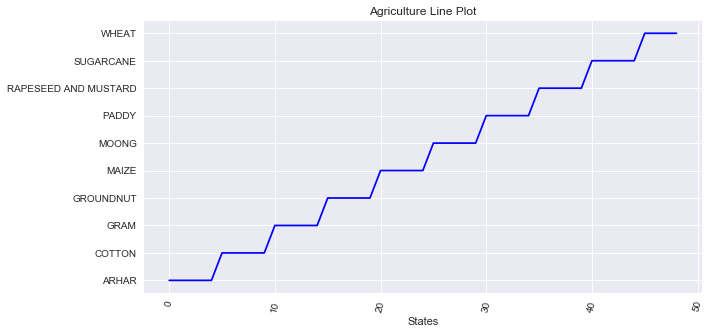

In [288]:
x= df1['State']
y= df1['Crop']
plt.figure(figsize=(10, 5))
plt.plot(y, color='blue')
plt.xlabel('States')

plt.title('Agriculture Line Plot')
plt.xticks(rotation=75)
plt.show()
#How do I show the States on x-axis?

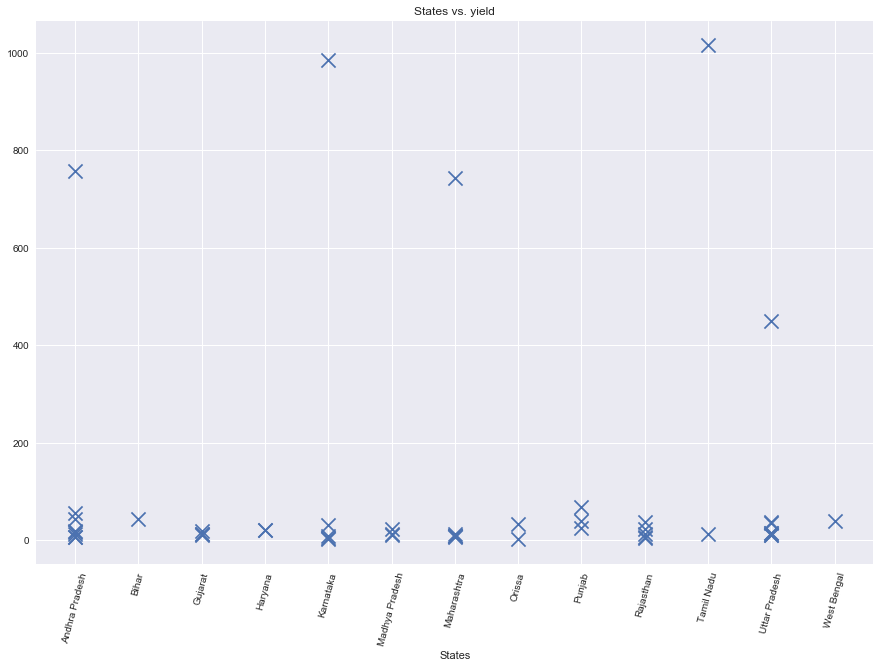

In [508]:
plt.figure(figsize=(15, 10))
plt.scatter(
    x=df1['State'],
    y=df1['Yield'],
    marker='x', s=200
)

plt.figure.autolayout : True 
plt.xticks(rotation=75)
plt.xlabel('States')

plt.title('States vs. yield')


plt.show()

This shows a few states have a few high yielding crops (yet to be seen).

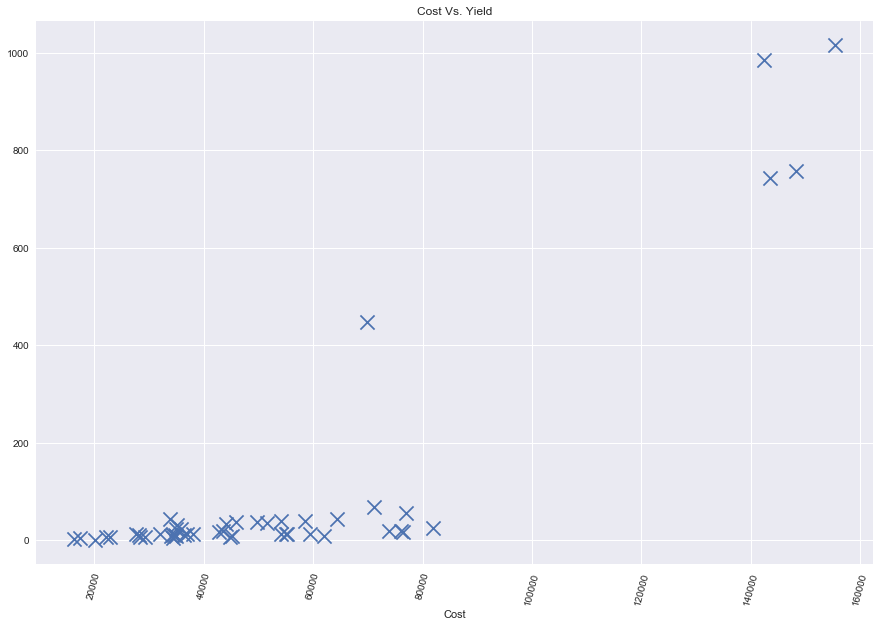

In [507]:
plt.figure(figsize=(15, 10))
plt.scatter(
    y=df1['Yield'],
    x=df1['costtotal'],
    marker='x', s=200
)

plt.figure.autolayout : True 
plt.xticks(rotation=75)
plt.xlabel('Cost')



plt.title('Cost Vs. Yield')


plt.show()

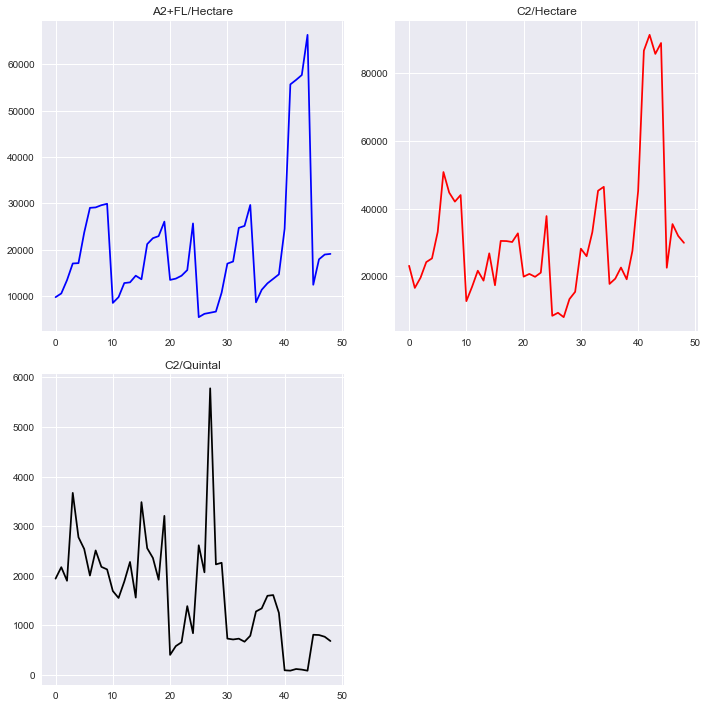

In [291]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(df1['CC1'], color='blue')
plt.title('A2+FL/Hectare')
#CC1= A2+FL/Hectare
#CC2= C2/Hectare
plt.subplot(2, 2, 2)
plt.plot(df1['CC2'], color='red')

plt.title('C2/Hectare')
plt.subplot(2, 2, 3)
plt.plot(df1['CC3'], color='black')
plt.title('C2/Quintal')

plt.tight_layout()
plt.show()

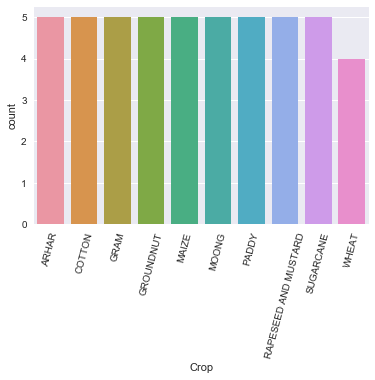

In [293]:
x=df1['Crop']
plt.xticks(rotation=75)
sns.countplot(x)

plt.show()

In [ ]:
CGroup.T

<h1> States vs. Cost+Yield </h1>


<p1>This bar chart below describes the amount of money each state invests for its respective crops.<p1>

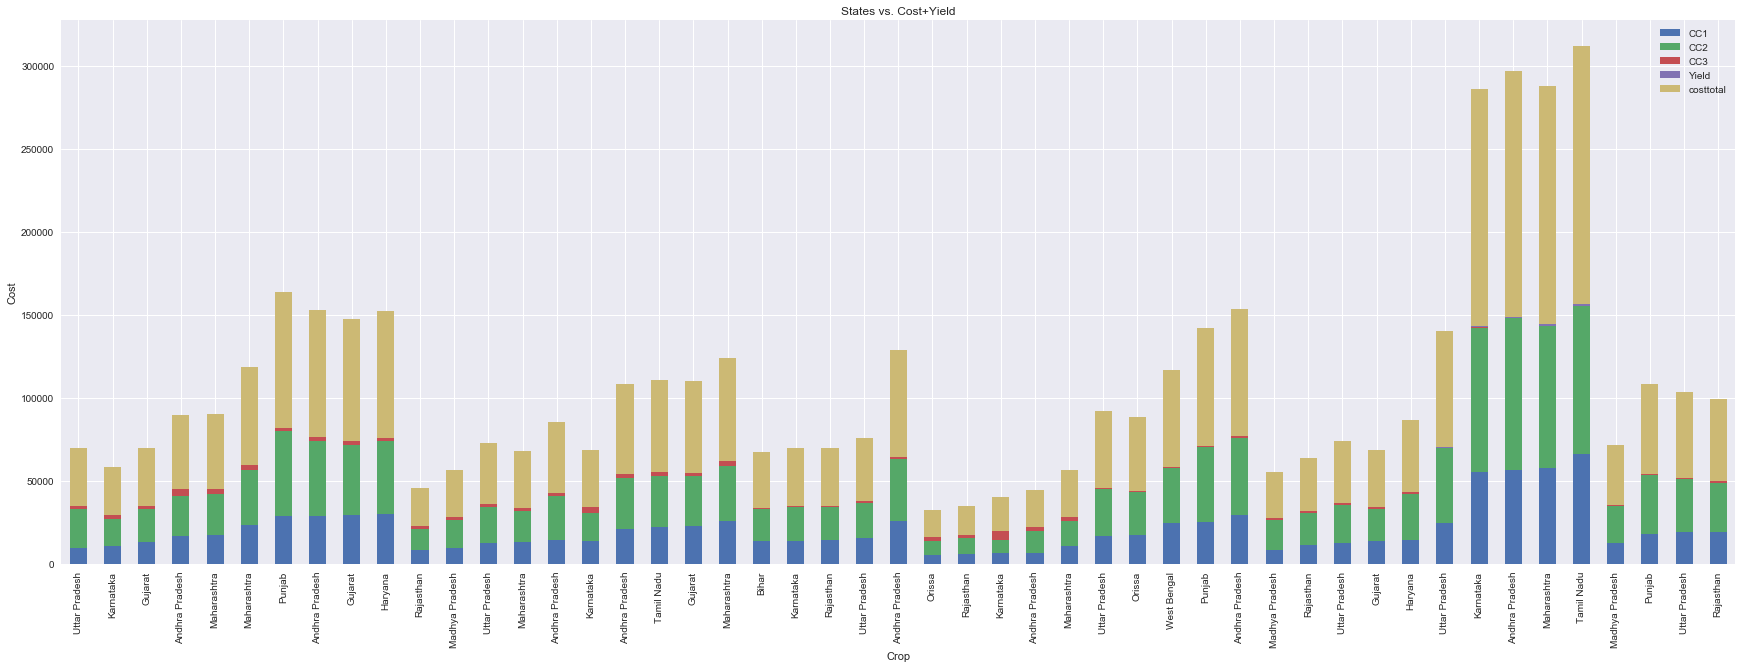

In [518]:
plot= df1.plot(df1['State'], kind='bar',stacked=True, legend=True)
plot.set_xlabel('Crop')
plot.set_ylabel('Cost')
plot.set_title('States vs. Cost+Yield')

sns.set_context({"figure.figsize": (30, 15)})

<h1> Crop Yield per State</h1>
This bar chart shows the yield per state.

Index(['Crop', 'State', 'CC1', 'CC2', 'CC3', 'Yield', 'costtotal'], dtype='object')


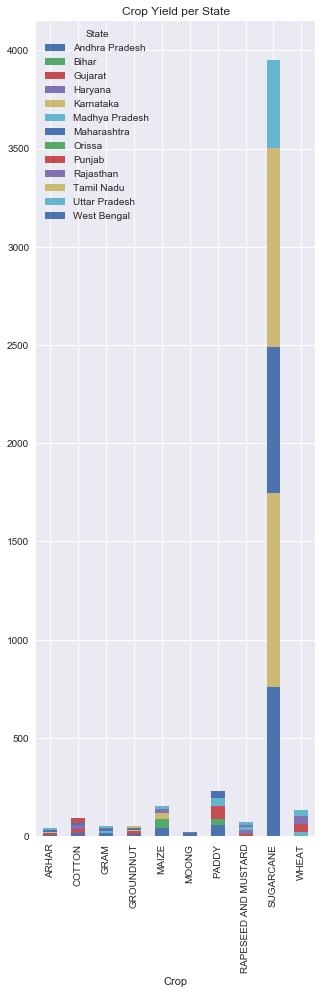

In [583]:
print(df1.columns)
columns = ['Crop','State','Yield']
new_data = df1[columns]
table = new_data.pivot('Crop','State','Yield')
table = table.fillna(0)
table.plot(kind='bar',stacked=True)
plt.title('Crop Yield per State')
sns.set_context({"figure.figsize": (5, 15)})

We can see that sugarcane is the clear front runner in terms of yield for five states.
It is however, a little difficult to tell which crop is grown in most states.

In [483]:
import statistics

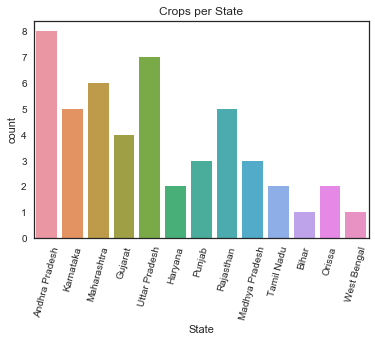

In [237]:
x=cropframe['State']
plt.xticks(rotation=75)
sns.countplot(x)
plt.title('Crops per State')
plt.show()

From this bar chart, we can tell that Andhra Pradesh grows the most number of crops.
The value_counts function confirms this.

In [491]:
df1.State.value_counts()

Andhra Pradesh    8
Uttar Pradesh     7
Maharashtra       6
Rajasthan         5
Karnataka         5
Gujarat           4
Punjab            3
Madhya Pradesh    3
Haryana           2
Orissa            2
Tamil Nadu        2
Bihar             1
West Bengal       1
Name: State, dtype: int64

In [629]:
df1.max()

Crop               WHEAT
State        West Bengal
CC1              66335.1
CC2              91442.6
CC3              5777.48
Yield            1015.45
costtotal         155446
dtype: object

This shows that wheat is the highest grown crop amongst the states. But is it the highest yielding?

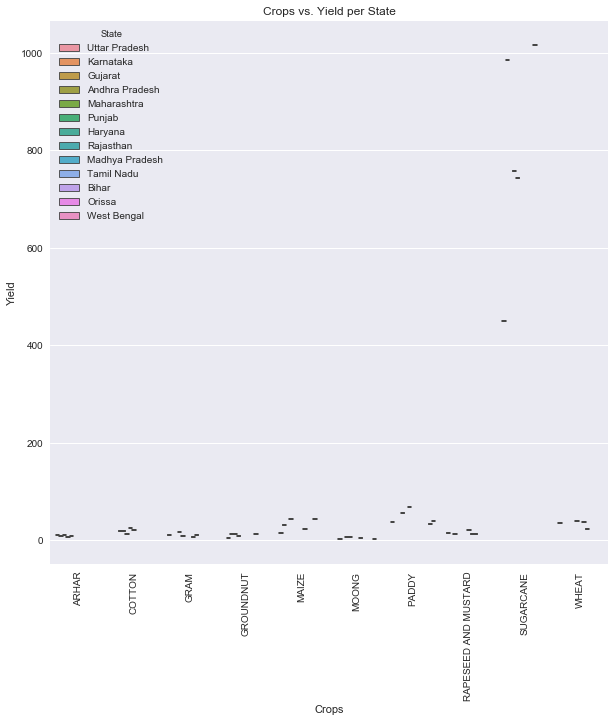

In [589]:
ax= sns.boxplot (x="Crop", y="Yield", hue="State", data=df1)
plt.xticks(rotation=90)
plt.title('Crops vs. Yield per State')
plt.xlabel('Crops')
sns.set_context({"figure.figsize": (10,10)})

This table below shows the cost each state incurs with the particular crop being produced.

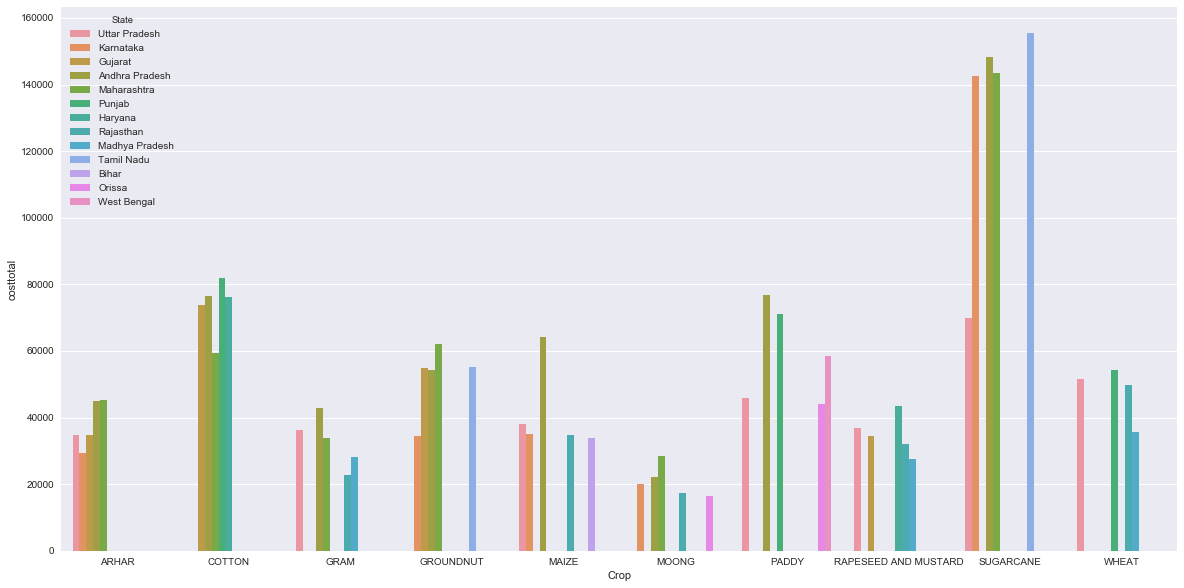

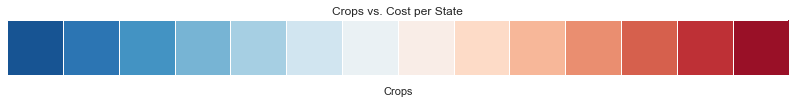

In [602]:

ax= sns.barplot (x="Crop", y="costtotal", hue="State", data=df1)
sns.palplot(sns.color_palette("RdBu_r", 14))
plt.xticks(rotation=90)
plt.title('Crops vs. Cost per State')
plt.xlabel('Crops')
sns.set_context({"figure.figsize": (20, 10)})

Unsurprisingly, sugarcane is the highest cost incurring crop, as well as the highest yielding one.

<h1>Statistical plots </h1>

Now to see the mean total cost of all the crops, and the standard deviation from the center.

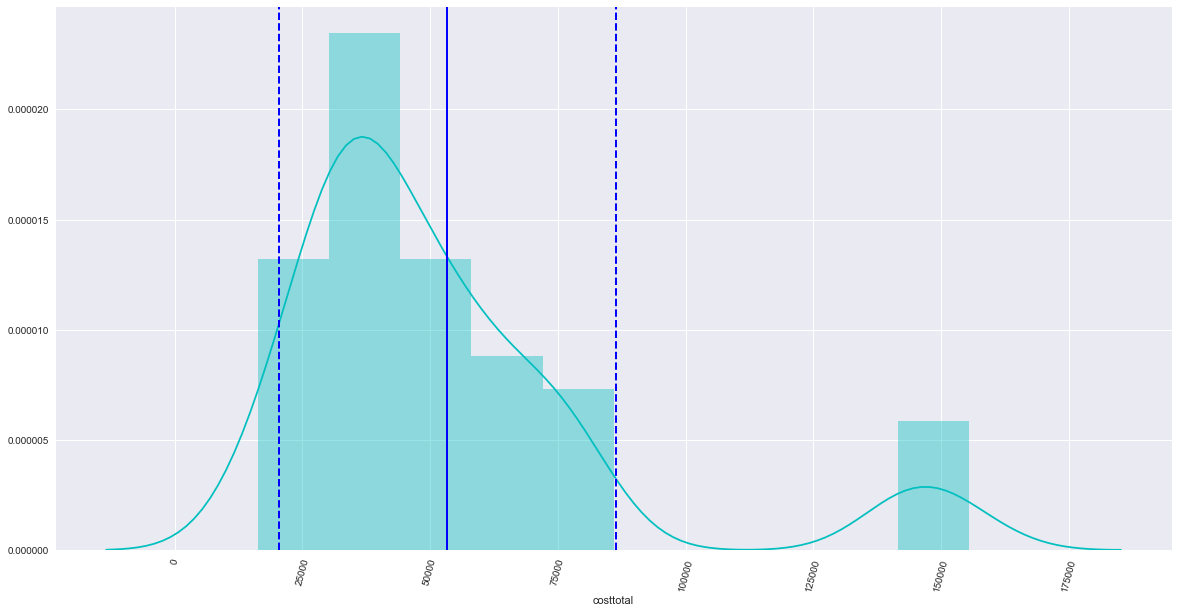

In [609]:
z=df1["costtotal"]
sns.distplot(z, bins=10, color = 'c') 
plt.axvline(z.mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(z.mean() + z.std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(z.mean()- z.std(), color='b', linestyle='dashed', linewidth=2)
plt.xticks(rotation=75)
plt.show()

This shows a positiviely skewed histogram. The bos plot below confirms it as well.

In [611]:
df1.costtotal.mean()

53348.74183673468

In [612]:
df1.costtotal.median()

44102.14

This shows us that the mean is higher than the median cost. This should be expected, as factors such as seed money (literal), labour charges, land costs, amount of crops grown, all vary from state to state.

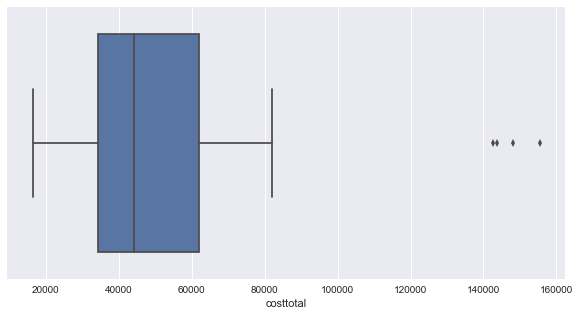

In [552]:
sns.boxplot(z)
sns.set_context({"figure.figsize": (5, 5)})
plt.show()

In [484]:
(values, counts) = np.unique(df1['costtotal'], return_counts=True)
ind = np.argmax(counts)
values[ind]

16364.66

In [485]:
df1['costtotal'].var()
np.var(df1.CC1)

180159210.67956644

In [486]:
np.std(df1['costtotal'], ddof=1)

32995.450990573416

In [487]:
np.std(df1['costtotal'] ,ddof=1) / np.sqrt(len(df1['CC1']))

4713.6358557962021

In [488]:
df1.costtotal.describe()

count        49.000000
mean      53348.741837
std       32995.450991
min       16364.660000
25%       34434.590000
50%       44102.140000
75%       61969.470000
max      155446.120000
Name: costtotal, dtype: float64

In [490]:
df1.groupby('State').describe()

CC1                                                    \
               count          mean           std       min         25%   
State                                                                    
Andhra Pradesh   8.0  25062.586250  14947.553399   6684.18  16394.2400   
Bihar            1.0  13513.920000           NaN  13513.92  13513.9200   
Gujarat          4.0  19944.207500   7810.307060  13468.82  13672.6850   
Haryana          2.0  22317.120000  10750.639369  14715.27  18516.1950   
Karnataka        5.0  20025.836000  20140.383463   6440.64  10593.1500   
Madhya Pradesh   3.0  10318.240000   1940.793980   8686.43   9245.1600   
Maharashtra      6.0  24726.826667  17195.305848  10780.76  14022.1000   
Orissa           2.0  11480.795000   8481.399358   5483.54   8482.1675   
Punjab           3.0  24049.143333   5632.735672  17945.58  21550.1650   
Rajasthan        5.0  11936.632000   5059.074809   6204.23   8552.6900   
Tamil Nadu       2.0  44421.460000  30990.510320  22507.86  33464.6600   
Uttar Pradesh    7.0  15939.518571   4862.771582   9794.05  12803.7250   
West Bengal      1.0  24731.060000           NaN  24731.06  24731.0600   

                                                  CC2                \
                      50%         75%       max count          mean   
State                                                                 
Andhra Pradesh  23458.050  29271.7875  56621.16   8.0  39378.633750   
Bihar           13513.920  13513.9200  13513.92   1.0  19857.700000   
Gujarat         18345.960  24617.4825  29616.09   4.0  27705.085000   
Haryana         22317.120  26118.0450  29918.97   2.0  35762.860000   
Karnataka       13647.100  13792.8500  55655.44   5.0  29829.766000   
Madhya Pradesh   9803.890  11134.1450  12464.40   3.0  19022.950000   
Maharashtra     20420.995  25486.8550  57673.60   6.0  35153.878333   
Orissa          11480.795  14479.4225  17478.05   2.0  17088.015000   
Punjab          25154.750  27100.9250  29047.10   3.0  43847.850000   
Rajasthan       11385.700  14421.4600  19119.08   5.0  18144.586000   
Tamil Nadu      44421.460  55378.2600  66335.06   2.0  59709.465000   
Uttar Pradesh   15635.430  18000.6900  24538.32   7.0  27655.332857   
West Bengal     24731.060  24731.0600  24731.06   1.0  33046.120000   

                  ...         Yield          costtotal                 \
                  ...           75%      max     count           mean   
State             ...                                                   
Andhra Pradesh    ...       46.0100   757.92       8.0   66225.426250   
Bihar             ...       42.9500    42.95       1.0   33776.050000   
Gujarat           ...       14.8500    19.05       4.0   49551.012500   
Haryana           ...       19.9300    19.94       2.0   59769.215000   
Karnataka         ...       31.1000   986.21       5.0   52276.036000   
Madhya Pradesh    ...       18.2650    23.59       3.0   30555.120000   
Maharashtra       ...       11.8500   744.01       6.0   62075.555000   
Orissa            ...       25.0675    32.42       2.0   30233.400000   
Punjab            ...       53.6200    67.41       3.0   69056.466667   
Rajasthan         ...       23.5600    37.19       5.0   31370.012000   
Tamil Nadu        ...      764.5825  1015.45       2.0  105352.820000   
Uttar Pradesh     ...       35.8000   448.89       7.0   44795.315714   
West Bengal       ...       39.0400    39.04       1.0   58508.430000   

                                                                             \
                         std       min         25%         50%          75%   
State                                                                         
Andhra Pradesh  37860.910513  22122.47  44356.1650   59274.025   76531.8450   
Bihar                    NaN  33776.05  33776.0500   33776.050   33776.0500   
Gujarat         18826.703155  34434.59  34797.9125   44951.835   59704.9350   
Haryana         23045.013050  43473.93  51621.5725  

In [91]:
df1.Crop.value_counts()

MOONG                   5
COTTON                  5
GROUNDNUT               5
SUGARCANE               5
RAPESEED AND MUSTARD    5
ARHAR                   5
PADDY                   5
MAIZE                   5
GRAM                    5
WHEAT                   4
Name: Crop, dtype: int64

In [466]:
norm = np.sort(df1.costtotal)
norm

array([  16364.66,   17438.49,   20086.76,   22122.47,   22855.2 ,
         27671.96,   28229.  ,   28413.45,   29294.29,   31986.83,
         33776.05,   33942.96,   34434.59,   34445.31,   34812.34,
         34890.52,   34919.02,   35046.08,   35764.4 ,   36334.15,
         36930.27,   38067.9 ,   42743.11,   43473.93,   44102.14,
         44893.85,   45176.61,   45899.12,   49679.02,   51651.96,
         54173.86,   54218.53,   54984.65,   55259.52,   58508.43,
         59367.73,   61969.47,   64329.52,   69871.47,   71115.85,
         73865.79,   76064.5 ,   76407.48,   76904.94,   81879.69,
        142507.74,  143583.11,  148183.51,  155446.12])

In [541]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [538]:
df1.describe()

,CC1,CC2,CC3,Yield,costtotal
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,31364.666735,1620.537755,98.086735,53348.741837
std,13561.435306,20095.783569,1104.990472,245.293123,32995.450991
min,5483.540000,7868.640000,85.790000,1.320000,16364.660000
25%,12774.410000,19259.840000,732.620000,9.590000,34434.590000
50%,17022.000000,25909.050000,1595.560000,13.700000,44102.140000
75%,24731.060000,35423.480000,2228.970000,36.610000,61969.470000
max,66335.060000,91442.630000,5777.480000,1015.450000,155446.120000


<h1> Random Cost Sampling </h1>

Seeing that CC3 is significantly smaller than CC1 and CC2, we will be using the latter two to take samples from their respective populations, and confirming whether the means of costs shown, are different from the means of the costs of the populations.

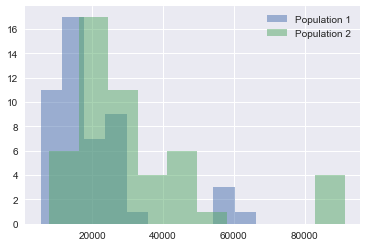

In [542]:
plt.hist(df1.CC1, alpha=0.5, label='Population 1') 
plt.hist(df1.CC2, alpha=0.5, label='Population 2') 

plt.legend(loc='upper right')
plt.show()

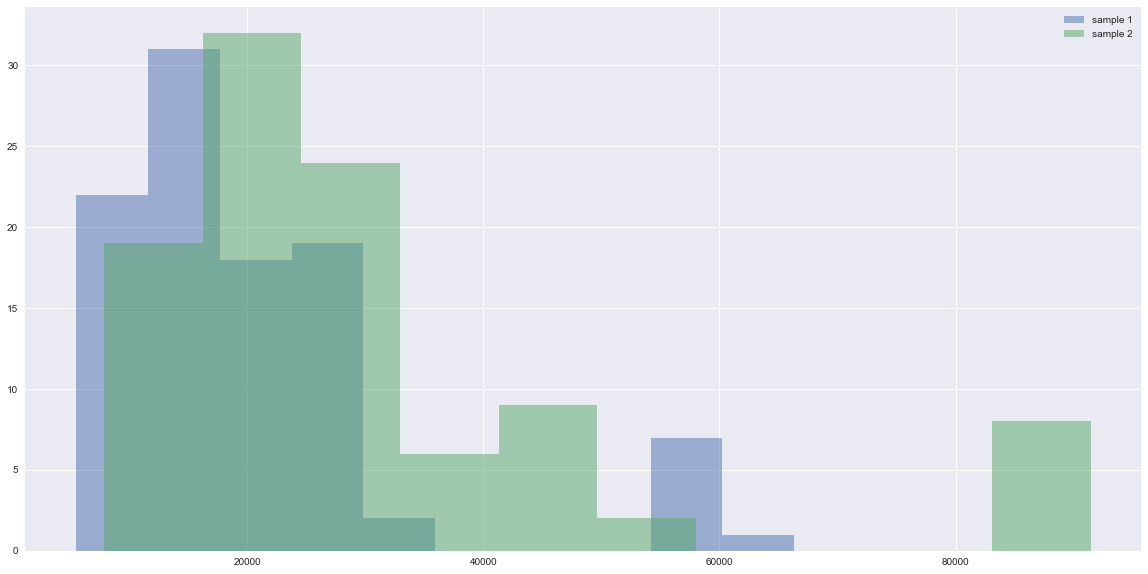

In [468]:
sample1 = np.random.choice(df1.CC1, 100, replace=True)
sample2 = np.random.choice(df1.CC2, 100, replace=True)


plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

<h1> t-test </h1>
Now, running the t-test:

In [469]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=3.8437895767713162, pvalue=0.00017020198439538089)


We see that t-statistic and p-value are small, meaning there is not much variability. However, being skewed, the tests should be revised.

<h1> Conclusion </h1>

In conclusion, sugarcane happens to be the highest yielding crop, with Andrha Pradesh producing the largest number og hih yielding crops. From the above random samplings, we can see that costs represent the population, and there isn't much variability. Another note was that the high yielding crops, were the most expensive to produce. For future work, Cost of production can be compared to the profit in the market. Also, we can see how much produce is being wasted due to rotting, improper storage, or even low demand. In the place of these crops, we can crops other crops, that may create a new demand, or fill in for crops that are currently not able to meet demands.